In [126]:
import pandas as pd
train_df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\titanic_train.csv')
unknown_df = pd.read_csv('C:/Users/Vaibhav/Desktop/BA/Datasets/titanic_test.csv')

In [127]:
unknown_df['Survived'] = -888

In [128]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [129]:
df = pd.concat((train_df, unknown_df), axis = 0)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [130]:
from sklearn.preprocessing import Imputer

In [131]:
imp = Imputer(strategy = "median")

In [132]:
imp.fit(df[["Fare", "Age"]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [133]:
df[["Fare", "Age"]]=imp.transform(df[["Fare", "Age"]])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 12 columns):
Age            1311 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1311 non-null float64
Name           1311 non-null object
Parch          1311 non-null int64
PassengerId    1311 non-null int64
Pclass         1311 non-null int64
Sex            1311 non-null object
SibSp          1311 non-null int64
Survived       1311 non-null int64
Ticket         1311 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 133.1+ KB


In [135]:
import numpy as np
np.where(df.Embarked.isnull())

(array([ 61, 829], dtype=int64),)

In [136]:
df.iloc[[61,829]]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


In [137]:
df.Embarked.value_counts(dropna = False)

S      915
C      270
Q      124
NaN      2
Name: Embarked, dtype: int64

In [138]:
df.Embarked = df.Embarked.astype("category")

In [139]:
df.Embarked = df.Embarked.cat.codes

In [140]:
df.Embarked.value_counts(dropna = False)

 2    915
 0    270
 1    124
-1      2
Name: Embarked, dtype: int64

In [142]:
df.loc[df.Embarked == -1, "Embarked"] = np.NaN

In [143]:
df.Embarked = df.Embarked.astype(np.float64)

In [120]:
df.Embarked.dtype

dtype('float64')

In [144]:
impute = Imputer(strategy="most_frequent")

In [145]:
df[["Embarked"]]=impute.fit_transform(df[["Embarked"]])

In [146]:
df[["Embarked"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 1 columns):
Embarked    1311 non-null float64
dtypes: float64(1)
memory usage: 20.5 KB


In [147]:
df.Embarked.value_counts()

2.0    917
0.0    270
1.0    124
Name: Embarked, dtype: int64

In [148]:
df.iloc[[61,829],:]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,2.0,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,2.0,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


In [152]:
df.Embarked = df.Embarked.replace({0:"C", 1:"Q", 2: "S"} )

---

In [149]:
df = pd.concat((train_df, unknown_df), axis = 0)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


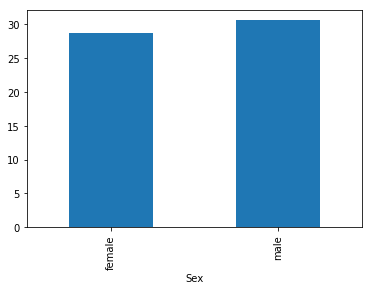

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby("Sex").Age.mean().plot.bar()

In [161]:
df.groupby("Pclass", "Sex").Age.transform("median")
#will impute the missing values with the mean /median age of each passenger class. 
#to be used when we feel if the categorical variable is responsible for high variance in the continuous variable

0      24.0
1      39.0
2      24.0
3      39.0
4      24.0
5      24.0
6      39.0
7      24.0
8      24.0
9      29.0
10     24.0
11     39.0
12     24.0
13     24.0
14     24.0
15     29.0
16     24.0
17     29.0
18     24.0
19     24.0
20     29.0
21     29.0
22     24.0
23     39.0
24     24.0
25     24.0
26     24.0
27     39.0
28     24.0
29     24.0
       ... 
390    39.0
391    39.0
392    24.0
393    29.0
394    24.0
395    39.0
396    24.0
397    39.0
398    24.0
399    24.0
400    39.0
401    29.0
402    39.0
403    39.0
404    39.0
405    29.0
406    29.0
407    39.0
408    24.0
409    24.0
410    24.0
411    39.0
412    24.0
413    24.0
414    39.0
415    24.0
416    24.0
417    24.0
418    24.0
419    24.0
Name: Age, Length: 1311, dtype: float64

In [162]:
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282


In [166]:
name = df.iloc[0, 4]
name

'Braund, Mr. Owen Harris'

In [186]:
name.split(",")[1].split(" ")[1].split(".")[0].lower()

'mr'

In [174]:
def GetTitle(name):
    t = name.split(",")[1].split(" ")[1].split(".")[0].lower()
    return t

In [175]:
df["Title"] = df.Name.apply(GetTitle)

In [177]:
df["Title_map"] = df.Name.map(GetTitle)

In [199]:
#Mr, Mrs, Miss, Master, Sir, Officer, Lady 
title_group = { 'mr' : 'Mr',
               'mrs' : 'Mrs',
               'miss':'Miss',
               'master': 'Master',
               'don': 'Sir',
               'rev': 'Sir',
               'dr': 'Officer',
               'mme': 'Mrs',
               'ms': 'Mrs',
               'major': 'Officer',
               'lady': 'Mrs',
               'sir': 'Sir',
               'mlle': 'Miss',
               'col': 'Officer',
               'capt': 'Officer',
               'the countess': 'Mrs',
               'jonkheer': 'Sir',
               'dona': "Mrs"}


In [200]:
df.Title = df.Title_map.map(title_group)

In [201]:
df.Title.value_counts()

Mr         758
Miss       262
Mrs        203
Master      61
Officer     15
Sir         11
Name: Title, dtype: int64

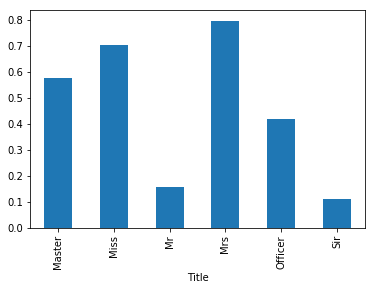

In [209]:
df[df.Survived !=-888].groupby("Title").Survived.mean().plot.bar()

In [215]:
df.groupby(["Title", "Embarked"]).Age.transform("mean")

0      31.622560
1      37.660000
2      20.440775
3      36.545455
4      31.622560
5      36.150000
6      31.622560
7       5.223415
8      36.545455
9      37.660000
10     20.440775
11     20.440775
12     31.622560
13     31.622560
14     20.440775
15     36.545455
16      6.200000
17     31.622560
18     36.545455
19     37.660000
20     31.622560
21     31.622560
22     23.952381
23     31.622560
24     20.440775
25     36.545455
26     34.376238
27     31.622560
28     23.952381
29     31.622560
         ...    
390    31.622560
391    36.545455
392     5.223415
393    31.622560
394    31.622560
395    36.545455
396    36.150000
397    37.660000
398    31.622560
399    36.150000
400    20.440775
401    31.622560
402    24.520833
403    31.622560
404    34.376238
405    34.376238
406    31.622560
407    34.376238
408    23.952381
409    20.440775
410    23.952381
411    36.000000
412    20.440775
413    31.622560
414    37.660000
415    31.622560
416    31.622560
417     6.4885

In [217]:
print(list(df.Cabin))

[nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6', 'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan, 'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan, nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan, nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan, nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan, nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan, 'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan, 'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan, 'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan, 'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'E33', nan, nan, nan, 'B19', nan, nan, nan, 'A7', nan, nan, 'C49', nan, nan, na

In [221]:
df.loc[df.Cabin =="T", "Cabin"] = np.NaN

In [226]:
df.iloc[1]["Cabin"][0]

'C'

In [277]:
deck = df.iloc[1].Cabin
deck

'C85'

In [280]:
type(deck)

str

In [244]:
df.Cabin.dtype

dtype('O')

In [ ]:
np.where(pd.notnull(deck), str(deck)[0], "P")

In [260]:
def getdeck(deck):
    val = np.where(pd.notnull(deck), str(deck)[0].upper(), "P")
    return val 

In [261]:
getdeck(deck)

array('C', dtype='<U1')

In [268]:
df["deck"]= df.Cabin.apply(getdeck)

In [269]:
df.deck.value_counts()

P    1017
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Cabin, dtype: int64

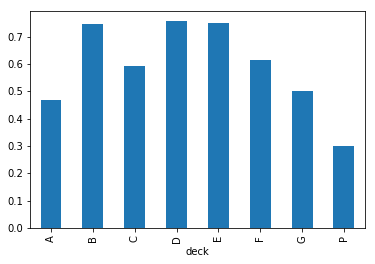

In [273]:
df[df.Survived!= -888].groupby("deck").Survived.mean().plot.bar()

In [276]:
df.Fare = df.groupby("deck").Fare.transform("mean")